Day 2: Naive Bayes (NB)
🎯 Objective of the day

Understand probabilistic classification with Bayes’ theorem.

Train Gaussian Naive Bayes on Iris.

Compare it with kNN and Logistic Regression.

Naive Bayes (Gaussian version)

How it works:

Based on Bayes’ theorem: uses probabilities to predict the most likely class.

Assumes features are independent given the class (“naive” assumption).

In Gaussian Naive Bayes, each feature within each class is modeled as a normal distribution with its own mean and variance.

For a new sample, it calculates the probability of the features under each class and picks the class with the highest probability.

Strengths:

Very fast and simple to train.

Works well with small datasets.

Performs surprisingly well even if independence assumption is not fully true.

Resistant to overfitting with many features.

Weaknesses:

Independence assumption often does not hold in real data.

Gaussian assumption may be unrealistic if data is not normally distributed.

Performs poorly when features are highly correlated.

Accuracy: 0.8222222222222222
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.78      0.54      0.64        13
           2       0.65      0.85      0.73        13

    accuracy                           0.82        45
   macro avg       0.81      0.79      0.79        45
weighted avg       0.83      0.82      0.82        45



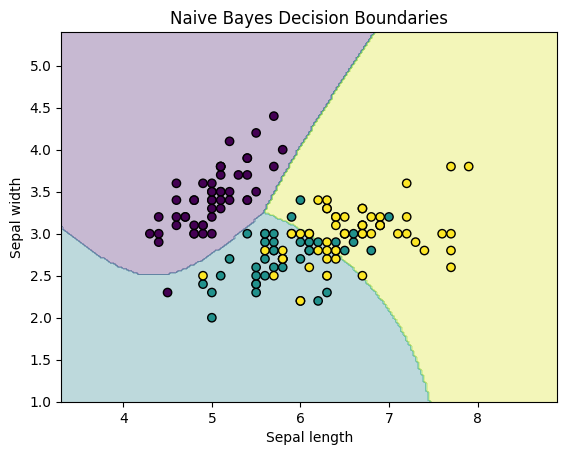

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import numpy as np

iris = load_iris()
X = iris.data[:, :2]   # sepal length & width (for plotting)
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Naive Bayes 

nb = GaussianNB()
nb.fit(X_train, y_train)

y_pred = nb.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Decision boundary visualization
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

Z = nb.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap="viridis")
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors="k", cmap="viridis")
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")
plt.title("Naive Bayes Decision Boundaries")
plt.show()


📊 Exercise of the Day

What accuracy did Naive Bayes achieve on the test set?

Compare the decision boundary with kNN (messy) and Logistic Regression (straight). How does NB look?

Why do you think Naive Bayes works well on small datasets like Iris?

1) It got 0.82 accuracy

2) NB looks clean. It uses smooth curves.

3) It works well because for each feature Naive Baye only needs and estimate of the mean and the variance. It doesn't use any complex apramteres, or iterative training which requires larger data sets.

🌟 Mini-Challenge

Train Naive Bayes on all 4 Iris features (X = iris.data).

Compare accuracy with just 2 features.
👉 What happens, and why?

In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import numpy as np

iris = load_iris()
X = iris.data   #All features
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Naive Bayes 

nb = GaussianNB()
nb.fit(X_train, y_train)

y_pred = nb.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9777777777777777
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.92      0.96        13
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



Accuracy is now almost perfect (0.977). I think this happens because the Gaussian asssumption of GNB fits the data reasonably well.

✨ Key Insight

Naive Bayes can look too simple in theory, but in practice it’s fast, effective, and surprisingly accurate on many datasets.

Works especially well in text classification (spam filters, sentiment analysis) where feature independence is “naive but useful.”